In [1]:
%load_ext autoreload
%autoreload 2

# import tensorflow as tf

# # Make tensorflow not take over the entire GPU memory
# for gpu in tf.config.experimental.list_physical_devices('GPU'):
#     tf.config.experimental.set_memory_growth(gpu, True)

from matplotlib import pyplot as plt
# from tfga import GeometricAlgebra

import torch
from torch_ga import GeometricAlgebra
from torch_ga.blades import BladeKind
from torch_ga.layers import GeometricProductConv1D

In [2]:
ga = GeometricAlgebra([0, 1, 1])
print(ga.basis_mvs)

tensor([[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.]])


In [3]:
"""
     p_4

p_2       p_3

     p_5

     p_1

p: x e_20 + y e_01 + e_12
"""

def mv_length(mv):
    return torch.sqrt((mv * ~mv).tensor)[..., 0]

def dist_point_line(point, line):
    point_normalized = point.tensor / mv_length(point)
    line_normalized = line.tensor / mv_length(line)
    return ga(point_normalized) & ga(line_normalized)

def dist_points(point_a, point_b):
    point_a_normalized = point_a.tensor / mv_length(point_a)
    point_b_normalized = point_b.tensor / mv_length(point_b)

    return ga(point_a_normalized) & ga(point_b_normalized)

def proj_point_line(point, line):
    return (point | line) * line

def intersect_lines(line_a, line_b):
    return line_a ^ line_b

def point_coordinates(point):
    z = point("12")
    x = point("20") / z
    y = point("01") / z
    return x, y

# Shift up vertically
shift_23 = 0.5 * ga.e01

p_1 = ga(ga.e12 - ga.e01)
p_2 = ga(ga.e12 - ga.e20 + shift_23)
p_3 = ga(ga.e12 + ga.e20 + shift_23)
p_4 = ga(ga.e12 + ga.e01)
p_5 = ga(ga.e12)

l_14 = p_1 & p_4
l_23 = p_2 & p_3

p2_on_l14 = proj_point_line(p_2, l_14)

print("P1:", p_1)
print("P2:", p_2)
print("P3:", p_3)
print("P4:", p_4)
print("P5:", p_5)
print("L14:", l_14)
print("Signed distance between P2 and L14:", dist_point_line(p_2, l_14))
print("Signed distance between P3 and L14:", dist_point_line(p_3, l_14))
print("P2 on L14:", p2_on_l14)

P1: MultiVector[-1.00*e_01 + 1.00*e_12]
P2: MultiVector[0.50*e_01 + 1.00*e_02 + 1.00*e_12]
P3: MultiVector[0.50*e_01 + -1.00*e_02 + 1.00*e_12]
P4: MultiVector[1.00*e_01 + 1.00*e_12]
P5: MultiVector[1.00*e_12]
L14: MultiVector[-2.00*e_1]
Signed distance between P2 and L14: MultiVector[1.00*1]
Signed distance between P3 and L14: MultiVector[-1.00*1]
P2 on L14: MultiVector[2.00*e_01 + 4.00*e_12]


/home/alesiani/python/torch_ga_private/torch_ga/torch_ga.py:618: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a, dtype=torch.float32)
/home/alesiani/python/torch_ga_private/torch_ga/torch_ga.py:619: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b, dtype=torch.float32)
/home/alesiani/python/torch_ga_private/torch_ga/torch_ga.py:538: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(tensor, dtype=torch.float32)


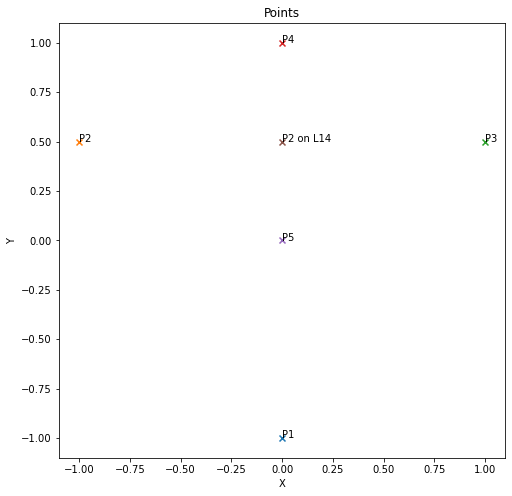

In [4]:
# Plot the results

def plot_point(point, name):
    xy = point_coordinates(point)
    plt.scatter(*xy, marker="x")
    plt.annotate(name, xy)

plt.figure(figsize=(8, 8))
plot_point(p_1, "P1")
plot_point(p_2, "P2")
plot_point(p_3, "P3")
plot_point(p_4, "P4")
plot_point(p_5, "P5")
plot_point(p2_on_l14, "P2 on L14")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Points")
plt.show()